# KI characterization test

This is a test of the KI promoter strength

In [1]:
%matplotlib inline

import sys
sys.path.insert(0, '../')
import BrasilUSP_iGEM_LabLib as LabLib

import scipy.stats
import pylab as pl
import numpy as np
import glob
from math import sqrt


## Definitions...

def biolrepl(wells):
    return np.array( [ wells[0:3].mean(), wells[3:6].mean(), wells[6:9].mean() ] ), \
        np.array( [ np.std(wells[0:3]), np.std(wells[3:6]), np.std(wells[6:9]) ] )

ColumnNames = {
    'A' : "-control",
    'B' : "+control",
    'C' : "Dev1",
    'D' : "KI",
    'E' : "LB"
}

MeaningColNames = { v: k for k, v in ColumnNames.items()}

def allCols(labels, r0 = 1, rf = 9):
    if type(labels) != list: 
        labels = [labels]
    cols = []
    for label in labels:
        row  = MeaningColNames[label]
        for j in range(r0,rf+1):
            cols.append(row + '0' + str(j))
    return cols

In [2]:
# I was having problems with char encoding, so...
import chardet
rawdata=open("REKI fluo 1.txt","r").read()
print "Encoding detection: ", chardet.detect(rawdata)

Encoding detection:  {'confidence': 0.7525, 'encoding': 'utf-8'}


### Reading measurements

Reading the file with the measurements. In these files we have two fluorescence measurements:

* GFP: excited 485nm, probed 525nm

In [3]:
FLlist = []
ODlist = []
tidx   = []
for file in glob.glob("REKI fluo*.txt"):
    tidx.append( float( file.split(' ')[2].split('.')[0] ) )
    FLlist.append(file)
    ODlist.append('REKI OD '+file.split(' ')[2].split('.')[0]+'.txt')

Idx = np.argsort(tidx)
FLlist = np.array(FLlist)[Idx]
ODlist = np.array(ODlist)[Idx]

# Do we have the list of files sorted properly?

Reading all the data...

In [4]:
reload(LabLib)
fldata = LabLib.ReadFluor_timefmt_nanomed(FLlist)
#oddata = LabLib.ReadFluor_timefmt_nanomed(ODlist, nr_header=2)

Let's take a look at the LB row...

In [5]:
fldata[allCols('LB')].head(3)

,E01,E02,E03,E04,E05,E06,E07,E08,E09
0,3867048,3790068,3765650,3792210,3844859,3772032,3800173,3689246,4022343
1,4049486,4025024,3946748,4012361,4094334,3963648,4074529,4024745,4043485
2,4148430,4199490,4257482,4204704,4299862,4263770,4313459,4446592,3858378


Name for each row.

Let's quickly check how the temperature varied during the experiment.

Average temperature: 25.6'C
Temperature range: 25.0'C - 26.0'C


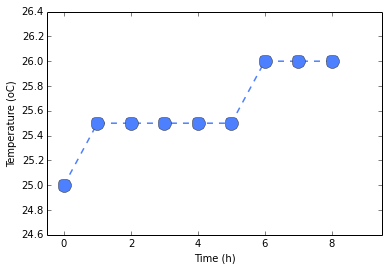

In [6]:
print "Average temperature: %4.1f'C" % (fldata['T(oC)'].mean())
print "Temperature range: %4.1f'C - %4.1f'C" % (fldata['T(oC)'].min(), fldata['T(oC)'].max())

pl.plot(fldata['T(oC)'], 'o--', lw=1.5, markersize=13., color=(0.3,0.5,1.0), markeredgecolor=(0.2,0.2,0.2))
pl.xlabel('Time (h)')
pl.xlim(-0.5,9.5)
pl.ylabel('Temperature (oC)')
pl.ylim(24.6,26.4)
pl.show()

## OD

In [7]:
oddata = LabLib.ReadFluor_timefmt_nanomed(ODlist, nr_header=2)
oddata[allCols('-control')].head(3)

,A01,A02,A03,A04,A05,A06,A07,A08,A09
0,0.1836,0.1839,0.1844,0.1894,0.1885,0.1857,0.1895,0.2004,0.2010
1,0.2089,0.2125,0.2095,0.2134,0.2168,0.2022,0.2104,0.2202,0.2149
2,0.2492,0.2479,0.2459,0.2328,0.2411,0.2282,0.2337,0.2518,0.2531


In [8]:
ColumnNames.values()

['-control', 'Dev1', '+control', 'LB', 'KI']

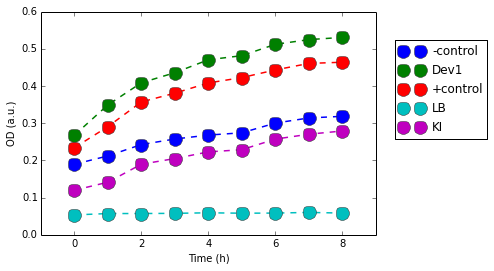

In [9]:
for CASE in ColumnNames.values():
    pl.plot(np.mean(np.array(oddata[allCols(CASE)]), axis=1), 
            'o--', lw=1.5, markersize=13., markeredgecolor=(0.2,0.2,0.2), label=CASE)

pl.xlabel('Time (h)')
pl.xlim(-1,9)
pl.ylabel('OD (a.u.)')
pl.ylim(0.0,0.6)
pl.legend(bbox_to_anchor=(1.35, 0.9))
pl.show()

### Control

Part of the control was contamined. To compute the average we have simply removed those points (all colony 3 and last column of colony 2).

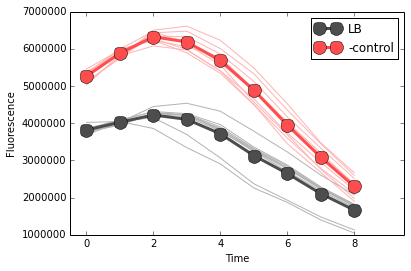

In [10]:
pl.plot(fldata[allCols('LB')], color=(0.7,0.7,0.7))
pl.plot(fldata[allCols('-control')], color=(1.0,0.7,0.7))


pl.plot(np.mean(np.array(fldata[allCols('LB')]), axis=1), 'o-',
        markersize=13, lw=3, color=(0.3,0.3,0.3), label='LB')
pl.plot(np.mean(np.array(fldata[allCols('-control')]), axis=1), 'o-',
        markersize=13, lw=3, color=(1.0,0.3,0.3), label='-control')

pl.xlabel('Time')
pl.xlim(-0.5,9.5)
pl.ylabel('Fluorescence')
pl.legend()
pl.show()

In [11]:
1e8

100000000.0

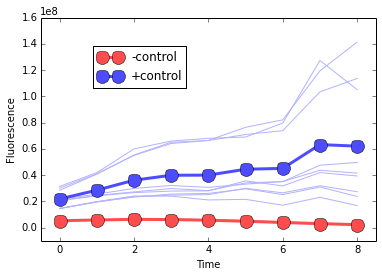

In [12]:
pl.plot(fldata[allCols('-control')], color=(1.0,0.7,0.7))
pl.plot(fldata[allCols('+control')], color=(0.7,0.7,1.0))


pl.plot(np.mean(np.array(fldata[allCols('-control')]), axis=1), 'o-',
        markersize=13, lw=3, color=(1.0,0.3,0.3), label='-control')
pl.plot(np.mean(np.array(fldata[allCols('+control')]), axis=1), 'o-',
        markersize=13, lw=3, color=(0.3,0.3,1.0), label='+control')

pl.xlabel('Time')
pl.xlim(-0.5,8.5)
pl.ylabel('Fluorescence')
pl.ylim(-1e7,1.6e8)
pl.legend(bbox_to_anchor=(0.45, 0.9))
pl.show()

### Normalizing the fluorescence measurements

 Needs better descriptions


In [35]:
NormdOD = {}
CASES = ['-control', '+control', 'Dev1', 'KI']
for CASE in CASES:
    NormdOD[CASE] = np.array(fldata[allCols(CASE)])/np.array(oddata[allCols(CASE)])

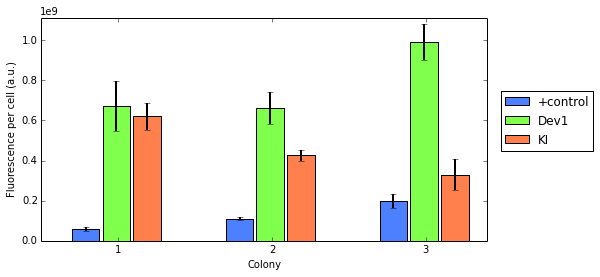

In [39]:
colors = {'-control':(0.5,0.5,0.5), '+control':(0.3,0.5,1.0), 'Dev1':(0.5,1.0,0.3), 'KI':(1.0,0.5,0.3)}
x = [0.8, 1.0, 1.2, 1.8, 2.0, 2.2, 2.8, 3.0, 3.2]
colonies = np.array( [1.0, 2.0, 3.0] )

pl.figure( figsize=(8,4) )

error_config = {'ecolor': '0.', 'width': 10.0, 'linewidth' : 2.}
time = 8
maxF = 2.

k = -1
for linen in ['+control', 'Dev1', 'KI']:
    k += 1
    X = NormdOD[linen][time]
    maxF = max(X.max(), maxF)
    vals, stds = biolrepl( X )
    pl.bar(colonies + k*0.2 - 0.3, vals, 0.18, color=colors[linen], label = linen,
           yerr=stds, error_kw=error_config)

pl.xlabel('Colony')
pl.ylabel('Fluorescence per cell (a.u.)')
pl.xlim(0.5,3.4)
pl.xticks([1.0, 2.0, 3.0])
pl.ylim(0,maxF+0.5)
pl.legend(bbox_to_anchor=(1.25, 0.7))
pl.show()

Plotting averages over all replicates


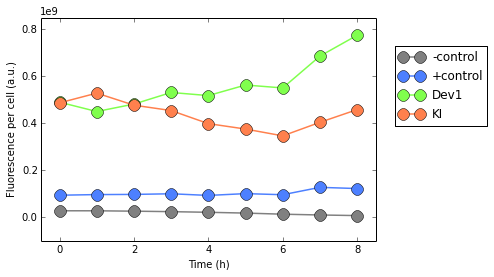

In [14]:
print 'Plotting averages over all replicates'

for C in ['-control','+control','Dev1','KI']:
    pl.plot(np.mean(NormdOD[C], axis=1), 
            'o-', lw=1.5, markersize=12., color=colors[C], label=C)

pl.xlabel('Time (h)')
pl.xlim(-0.5, 8.5)
pl.ylabel('Fluorescence per cell (a.u.)')
pl.ylim(-1e8,8.5e8)
pl.legend(bbox_to_anchor=(1.35, 0.9))
pl.show()

Plotting averages over all replicates


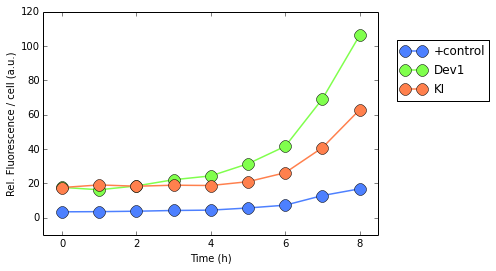

In [15]:
print 'Plotting averages over all replicates'

colors = {'-control':(0.5,0.5,0.5), '+control':(0.3,0.5,1.0), 'Dev1':(0.5,1.0,0.3), 'KI':(1.0,0.5,0.3)}

for C in ['+control','Dev1','KI']:
    pl.plot(np.mean(NormdOD[C], axis=1)/np.mean(NormdOD['-control'], axis=1), 
            'o-', lw=1.5, markersize=12., color=colors[C], label=C)

pl.xlabel('Time (h)')
pl.xlim(-0.5, 8.5)
pl.ylabel('Rel. Fluorescence / cell (a.u.)')
pl.ylim(-10,120)
pl.legend(bbox_to_anchor=(1.35, 0.9))
pl.show()

In Devs we have the now normalized measurements for all three devices. Let's start by checking if the differences are statistically significant

### Promoter strength

In [16]:
dNormdOD = {}
CASES = ['-control', '+control', 'Dev1', 'KI']
for CASE in CASES:
    dNormdOD[CASE] = np.diff( np.array(fldata[allCols(CASE)]), axis=0 )/ np.array(oddata[allCols(CASE)])[1:]

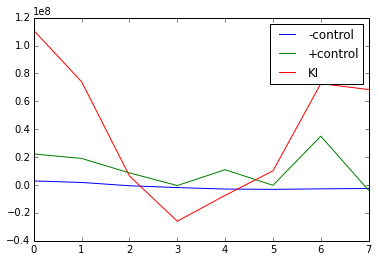

In [17]:
derivative = {}
PromStrength = {}
stdPS = {}
derivative['Dev1'] = dNormdOD['Dev1'].mean(axis=1)
PromStrength['Dev1'] = 0.7
stdPS['Dev1'] = 0.
for C in ['-control','+control','KI']:
    derivative[C] = dNormdOD[C].mean(axis=1)
    pl.plot(derivative[C], label=C)
    
    R = derivative[C] / derivative['Dev1']
    PromStrength[C] = R.mean()
    stdPS[C] = R.std()

pl.legend()
pl.show()

In [18]:
print PromStrength
print stdPS

{'-control': -0.03346538892555033, 'Dev1': 0.7, 'KI': 0.35579668171502421, '+control': 0.11941960642105076}
{'-control': 0.055182120688832756, 'Dev1': 0.0, 'KI': 0.666928986074526, '+control': 0.11861763563343387}


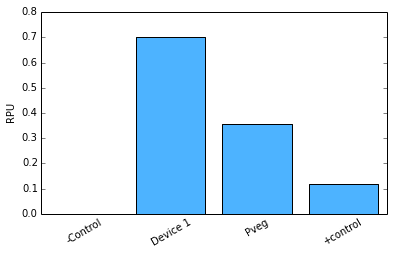

In [19]:
error_config = {'ecolor': '0.', 'width': 10.0, 'linewidth' : 2.}

fig = pl.figure()
ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))

pl.bar(np.array(range(4))-0.4, PromStrength.values(), 0.8, color=(0.3,0.7,1.0),
      )#yerr=stdPS.values(), error_kw=error_config)

pl.xticks(np.arange(0,4), ['-Control', 'Device 1', 'Pveg', '+control'], 
         rotation=30)

ax.xaxis.set_ticks_position('none')
pl.ylim(0.0,0.8)
pl.ylabel('RPU')
pl.show()